<a href="https://colab.research.google.com/github/Mari157mjs/Integraci-n-de-Datos/blob/main/Reto1_MSM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: **Mariana Sánchez Marin**

# **CASO DE ESTUDIO 0**

Evolución de la distribución agregada de perdidas.

Una FINTECH quiere caracterizar la evolución de sus pérdidas en la colocación de sus créditos para los últimos cuatro años de operación.

Para la caracterización de la distribución agregada de pérdidas, se utilizarán como referencias las variables:  
**Probabilidad de Default**
**Exposición del Activo**,
**LGD (Garantía del Crédito)**.
- La entidad financiera posee un horizonte de pérdidas que cubre un total de 4 años (**Año 1, Año 2, Año 3, Año 4**), para lo cual se quiere evaluar la evolución de las pérdidas durante este periodo.

0. Se cargan las librerías de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Para gráfico de distribuciones

from google.colab import drive #conexión Automática con el Drive
drive.mount('/content/drive')

Mounted at /content/drive


# **AÑO 1**

1. Se cargan los datos de trabajo **AÑO 1**




In [ ]:
nxl='/content/drive/MyDrive/Integración de Datos y Pros./RETO 1/1. SolicitantesCrédito(USD)_Años.xlsx'
XDB=pd.read_excel(nxl,sheet_name=5) #Para traer de la hoja que queramos de excel
display(XDB)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,6436,54,Mujer,Separado,0,1,1,3,Técnico,Indefinido,...,18,87.483415,Buenas Referencias,Codeudor,Sin Patrimonio,Mora mayor a 60 Dìas,1,0.024565,623.369751,0.457573
1,6437,28,Hombre,Casado,1,0,0,3,Tecnólogo,Ninguno,...,60,6.849567,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.113544,491.716217,0.528300
2,6438,27,NR,Soltero,1,1,1,2,Primaria,Indefinido,...,48,5.907680,Buena Experiencia CFB,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.140295,416.151337,0.116118
3,6439,43,Mujer,Soltero,3,3,3,2,Técnico,Ninguno,...,36,8.664364,Buena Experiencia CFB,Libranza Establecida,Prop.sin Hipoteca,Sin experiencia,0,0.289542,381.160431,0.606498
4,6440,49,Mujer,Soltero,0,1,1,2,Bachiller,Ninguno,...,3,167.064101,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.135805,378.608978,0.046469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,8372,48,Hombre,Separado,0,0,0,3,Tecnólogo,Fijo,...,36,27.043503,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.056132,550.980408,0.122566
1338,8374,31,Hombre,Soltero,2,0,0,5,Bachiller,Indefinido,...,48,25.579568,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.035120,659.471375,0.321453
1339,8375,38,Hombre,Separado,0,0,0,3,Bachiller,Labor Contratada,...,36,21.508792,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.101976,465.011536,0.017814
1340,8376,43,Mujer,Casado,1,2,2,2,Tecnólogo,Ninguno,...,36,11.047468,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.156707,423.237305,0.265477


In [ ]:
#Se calcula la distribución LDA
LDA=XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])
display(LDA)

,0
0,49.091727
1,46.807427
2,31.491289
3,111.478589
4,69.142679
...,...
1337,47.135679
1338,40.412661
1339,61.750988
1340,60.599575


2. Caracterización de la Distribución LDA

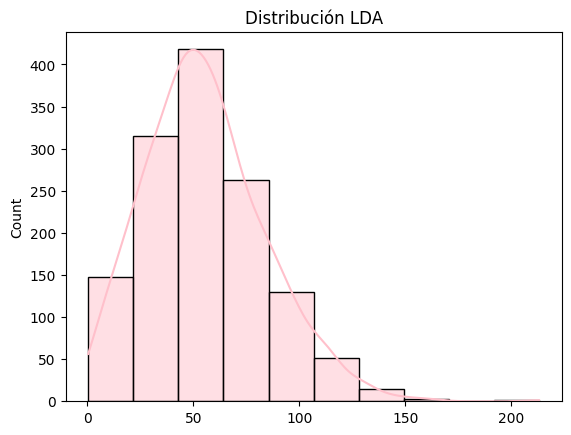

In [ ]:
NC=10 #

plt.figure()
sns.histplot(LDA,kde=True,bins=NC,color='Pink')
plt.title('Distribución LDA')
plt.show()

In [ ]:
#Obtenemos la información de la Distribución
counts, bin_edges = np.histogram(LDA, bins=NC)
LI=bin_edges[:-1];LS=bin_edges[1:]
mc=(LI+LS)/2

In [ ]:
#Se crea la tabla de caracterización
TAsq=np.column_stack((LI,LS,counts,mc))
df=pd.DataFrame(TAsq,columns=['LI','LS','ND','perdida'])
display(df)

,LI,LS,ND,perdida
0,0.413092,21.695260,147.0,11.054176
1,21.695260,42.977428,315.0,32.336344
2,42.977428,64.259597,418.0,53.618513
3,64.259597,85.541765,263.0,74.900681
4,85.541765,106.823933,130.0,96.182849
5,106.823933,128.106101,51.0,117.465017
6,128.106101,149.388270,14.0,138.747186
7,149.388270,170.670438,3.0,160.029354
8,170.670438,191.952606,0.0,181.311522
9,191.952606,213.234775,1.0,202.593690


3. Se obtienen las medias de dispersión (Asimetría, Kurtosis) y tendencia central (Media, varianza, desviación)

In [ ]:
u= np.sum(mc*counts)/np.sum(counts)#valor esperado
print("La media de los datos es:",u)

varianza=np.sum(counts*(mc-u)**2)/np.sum(counts)
print("La varianza de los datos es:",varianza)

desviacion=np.sqrt(varianza)
print("La desviación de los datos es:",desviacion)

#Quiero identificar datos raros o outliers
LIe=u+2*desviacion;Lse=u+2*desviacion
filas_out=np.where((LIe<LDA)|(LDA<Lse)) [0]
#LDA.iloc[filas_out,]

from scipy.stats import skew, kurtosis
print("El coeficiente de asimetría es:",skew(LDA))
print("El coeficiente de curtosis es:",kurtosis(LDA))

#Coeficiente de Asimetría
cas=np.sum(counts*(mc-u)**3)/np.sum(counts*desviacion**3)
print("El coeficiente de asimetría es:",cas)
vcas=(skew(LDA)-cas)/skew(LDA)
print("La variación del coeficiente de asimetría es:",vcas*100)

#Coeficiente de Curtosis
curt=np.sum(counts*(mc-u)**4)/np.sum(counts*desviacion**4)-3
print("El coeficiente de curtosis es:",curt)

La media de los datos es: 55.91800167999396
La varianza de los datos es: 836.1104127631511
La desviación de los datos es: 28.91557387919443
El coeficiente de asimetría es: 0.6074481010737891
El coeficiente de curtosis es: 0.6938886954460353
El coeficiente de asimetría es: 0.5936899030624092
La variación del coeficiente de asimetría es: 2.264917445138022
El coeficiente de curtosis es: 0.49072605058951346


**ANÁLISIS DE LOS RESULTADOS AÑO 1**


ANÁLISIS: De acuerdo con la base de datos, se puede observar un total de 1342 datos y un total de 36 variables. De las medidas de tendencia central se puede observar que la media de las pérdidas se ubicó 55.918 dolares por crédito, mientras que la desviación de los datos se ubico en promedio en los 28.915 dolares. Es importante mencionar que el coeficiente de asimetría se ubico levemente por encima de cero (0.607 y 0.593), lo que indica que la distribución tiende a ser de cola larga. La curtosis es positiva (0.693 y 0.490), lo que indica que la distribución tiene colas más pesadas y un pico más pronunciado en comparación con una distribución normal. En este sentido se pudo evidenciar un total de 0 datos outliers, con respecto al total de los datos, esto representa el 0% (0/1342) de los datos raros, lo que esta por debajo del 5%.

4. Pérdidas Esperadas, Pérdidas No Esperadas, Pérdidas Catastroficas.

In [ ]:
PE=len(np.where(LDA<u)[0])
print("Las Pérdidas Esperadas son:",PE)
OpVar=np.percentile(LDA,99.9)
print("El costo de aseguramiendo de cada crédito es:",OpVar)
PC=len(np.where(LDA>OpVar)[0])
print("Las Pérdidas Catastróficas son:",PC)
PNE=len(np.where((LDA>u)&(LDA<OpVar))[0])
print("Las Pérdidas No Esperadas son:",PNE)

Las Pérdidas Esperadas son: 729
El costo de aseguramiendo de cada crédito es: 161.29129989014118
Las Pérdidas Catastróficas son: 2
Las Pérdidas No Esperadas son: 611


# **AÑO 2**

5. Se cargan los datos de trabajo **AÑO 2**

In [ ]:
XDB=pd.read_excel(nxl,sheet_name=4)
display(XDB)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,4285,52,Hombre,Casado,0,0,0,3,Tecnólogo,Indefinido,...,24,5.966434,Buenas Referencias,Hipoteca,Prop.sin Hipoteca,Mora mayor a 60 Dìas,0,0.253213,358.859253,0.109183
1,4286,31,Hombre,Casado,3,1,1,2,Bachiller,Ninguno,...,3,82.453584,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.212950,296.161011,0.004476
2,4288,29,NR,Soltero,0,0,0,3,Tecnólogo,Fijo,...,24,22.023156,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Màximo 3 moras 30 Dìas,1,0.105714,406.482330,0.120763
3,4292,38,Mujer,Casado,0,0,0,2,Técnico,Ninguno,...,36,3.179137,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.292361,312.640320,0.162121
4,4294,32,NR,Soltero,1,0,0,3,Bachiller,Fijo,...,36,17.509553,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.082367,472.922882,0.210041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6431,41,NR,Casado,3,3,3,2,Primaria,Ninguno,...,36,3.565784,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.310774,363.216125,0.170423
1496,6432,43,Hombre,Viudo,1,1,1,5,Técnico,Fijo,...,24,21.137539,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.129138,489.444824,0.394218
1497,6433,49,NR,Casado,0,2,2,2,Tecnólogo,Ninguno,...,36,27.632010,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.081944,505.672943,0.196060
1498,6434,65,NR,Soltero,3,0,0,2,Bachiller,Indefinido,...,48,14.354478,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.084422,568.723694,0.318254


In [ ]:
#Se calcula la distribución LDA
LDA=XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])
display(LDA)

,0
0,33.565593
1,51.362740
2,52.265663
3,29.877416
4,48.271477
...,...
1495,35.876078
1496,76.230443
1497,74.910707
1498,54.383147


6. Caracterización de la Distribución LDA para el **AÑO 2**

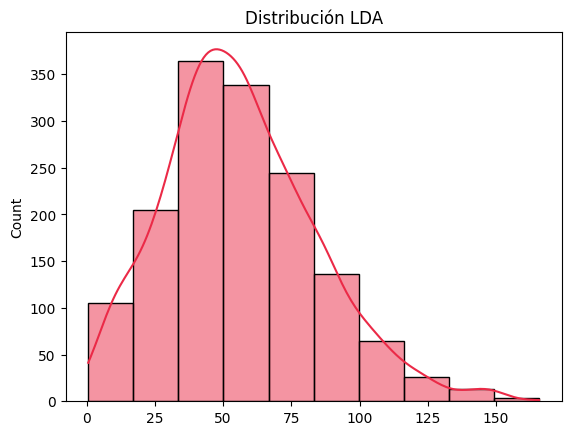

In [ ]:
NC=10 #

plt.figure()
sns.histplot(LDA,kde=True,bins=NC,color='#EB2A47')
plt.title('Distribución LDA')
plt.show()


In [ ]:
#Obtenemos la información de la Distribución
counts, bin_edges = np.histogram(LDA, bins=NC)
LI=bin_edges[:-1];LS=bin_edges[1:]
mc=(LI+LS)/2

In [ ]:
#Se crea la tabla de caracterización
TAsq=np.column_stack((LI,LS,counts,mc))
df=pd.DataFrame(TAsq,columns=['LI','LS','ND','perdida'])
display(df)

,LI,LS,ND,perdida
0,0.568346,17.091246,105.0,8.829796
1,17.091246,33.614145,205.0,25.352695
2,33.614145,50.137045,364.0,41.875595
3,50.137045,66.659945,338.0,58.398495
4,66.659945,83.182844,244.0,74.921395
5,83.182844,99.705744,136.0,91.444294
6,99.705744,116.228644,65.0,107.967194
7,116.228644,132.751544,26.0,124.490094
8,132.751544,149.274443,13.0,141.012993
9,149.274443,165.797343,4.0,157.535893


7. Se obtienen las medias de dispersión para el **AÑO 2** (Asimetría, Kurtosis) y tendencia central (Media, varianza, desviación)

In [ ]:
u= np.sum(mc*counts)/np.sum(counts)#valor esperado
print("La media de los datos es:",u)

varianza=np.sum(counts*(mc-u)**2)/np.sum(counts)
print("La varianza de los datos es:",varianza)

desviacion=np.sqrt(varianza)
print("La desviación de los datos es:",desviacion)

#Quiero identificar datos raros o outliers
LIe=u+2*desviacion;Lse=u+2*desviacion
filas_out=np.where((LIe<LDA)|(LDA<Lse)) [0]
#LDA.iloc[filas_out,]

from scipy.stats import skew, kurtosis
print("El coeficiente de asimetría es:",skew(LDA))
print("El coeficiente de curtosis es:",kurtosis(LDA))

#Coeficiente de Asimetría
cas=np.sum(counts*(mc-u)**3)/np.sum(counts*desviacion**3)
print("El coeficiente de asimetría es:",cas)
vcas=(skew(LDA)-cas)/skew(LDA)
print("La variación del coeficiente de asimetría es:",vcas*100)

#Coeficiente de Curtosis
curt=np.sum(counts*(mc-u)**4)/np.sum(counts*desviacion**4)-3
print("El coeficiente de curtosis es:",curt)

La media de los datos es: 56.36067049807551
La varianza de los datos es: 794.299449263555
La desviación de los datos es: 28.18331863467386
El coeficiente de asimetría es: 0.5654219317544418
El coeficiente de curtosis es: 0.3749822454394929
El coeficiente de asimetría es: 0.5398359603970553
La variación del coeficiente de asimetría es: 4.525111234719186
El coeficiente de curtosis es: 0.2591591450063109


ANÁLISIS DE LOS RESULTADOS **AÑO 2**

ANÁLISIS: De acuerdo con la base de datos, se puede observar un total de 1500 datos y un total de 36 variables. De las medidas de tendencia central se puede observar que la media de las pérdidas se ubicó 56.360 dolares por crédito, mientras que la desviación de los datos se ubico en promedio en los 28.183 dolares. Es importante mencionar que el coeficiente de asimetría se ubico levemente por encima de cero (0.565 y 0.539), lo que indica que la distribución tiende a ser de cola larga. La curtosis es positiva (0.374 y 0.259), lo que indica que la distribución tiene colas más pesadas y un pico más pronunciado en comparación con una distribución normal.

8. Pérdidas Esperadas, Pérdidas No Esperadas, Pérdidas Catastroficas.

In [ ]:
PE=len(np.where(LDA<u)[0])
print("Las Pérdidas Esperadas son:",PE)
OpVar=np.percentile(LDA,99.9)
print("El costo de aseguramiendo de cada crédito es:",OpVar)
PC=len(np.where(LDA>OpVar)[0])
print("Las Pérdidas Catastróficas son:",PC)
PNE=len(np.where((LDA>u)&(LDA<OpVar))[0])
print("Las Pérdidas No Esperadas son:",PNE)



Las Pérdidas Esperadas son: 813
El costo de aseguramiendo de cada crédito es: 149.7093186014969
Las Pérdidas Catastróficas son: 2
Las Pérdidas No Esperadas son: 685


# **AÑO 3**

9. Se cargan los datos de trabajo **AÑO 3**

In [ ]:
XDB=pd.read_excel(nxl,sheet_name=3)
display(XDB)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,2112,33,Hombre,Casado,0,1,1,4,Técnico,Indefinido,...,18,52.546662,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.064700,498.646271,0.005317
1,2115,42,Hombre,Soltero,1,1,1,5,Bachiller,Ninguno,...,18,2.808395,Sin Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.297233,371.733276,0.295880
2,2116,34,Hombre,Soltero,0,2,2,2,Bachiller,Indefinido,...,36,10.409358,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.122595,418.416077,0.004645
3,2117,47,Hombre,Casado,1,0,0,3,Profesional,Indefinido,...,24,80.445793,Buena Experiencia CFB,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,1,0.034746,593.847656,0.385068
4,2118,67,Mujer,Casado,1,0,0,3,Bachiller,Indefinido,...,36,27.508639,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.081015,567.578308,0.054015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,4275,52,NR,Soltero,3,0,0,3,Bachiller,Indefinido,...,36,2.723832,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.300094,392.462311,0.061951
1497,4277,41,Hombre,Soltero,0,0,0,3,Técnico,Ninguno,...,24,29.256105,Buena Experiencia CFB,Fondo de Garantia,Sin Patrimonio,Con Experiencia sin Mora,1,0.070680,471.957642,0.181782
1498,4279,47,Hombre,Casado,0,0,0,5,Primaria,Indefinido,...,24,48.038625,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.016880,676.783752,0.155792
1499,4281,29,NR,Soltero,0,0,0,2,Bachiller,Ninguno,...,18,26.637042,Buenas Referencias,Con Codeudor(es),Prop.y Vehìculo,Con Experiencia sin Mora,1,0.154959,326.336273,0.511715


In [ ]:
#Se calcula la distribución LDA
LDA=XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])
display(LDA)

,0
0,53.566719
1,16.953516
2,35.462688
3,77.548756
4,64.974313
...,...
1496,24.010720
1497,48.948467
1498,18.773132
1499,97.794371


10. Caracterización de la Distribución LDA

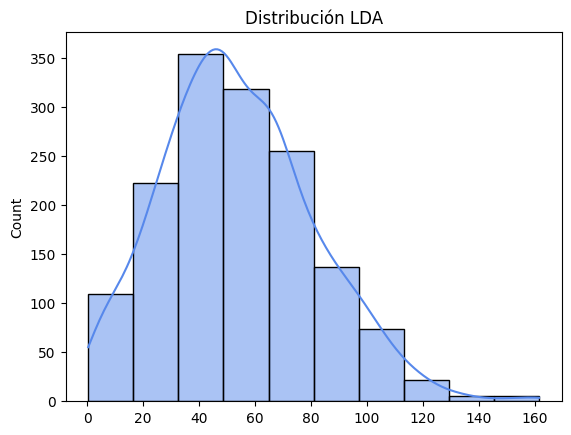

In [ ]:
NC=10 #

plt.figure()
sns.histplot(LDA,kde=True,bins=NC,color='#5788EB')
plt.title('Distribución LDA')
plt.show()


In [ ]:
#Obtenemos la información de la Distribución
counts, bin_edges = np.histogram(LDA, bins=NC)
LI=bin_edges[:-1];LS=bin_edges[1:]
mc=(LI+LS)/2

In [ ]:
#Se crea la tabla de caracterización
TAsq=np.column_stack((LI,LS,counts,mc))
df=pd.DataFrame(TAsq,columns=['LI','LS','ND','perdida'])
display(df)

,LI,LS,ND,perdida
0,0.427835,16.545128,109.0,8.486481
1,16.545128,32.662422,222.0,24.603775
2,32.662422,48.779716,354.0,40.721069
3,48.779716,64.897009,318.0,56.838362
4,64.897009,81.014303,255.0,72.955656
5,81.014303,97.131597,137.0,89.072950
6,97.131597,113.248890,74.0,105.190244
7,113.248890,129.366184,22.0,121.307537
8,129.366184,145.483478,5.0,137.424831
9,145.483478,161.600771,5.0,153.542125


11. Se obtienen las medias de dispersión **AÑO 3** (Asimetría, Kurtosis) y tendencia central (Media, varianza, desviación)

In [ ]:
u= np.sum(mc*counts)/np.sum(counts)#valor esperado
print("La media de los datos es:",u)

varianza=np.sum(counts*(mc-u)**2)/np.sum(counts)
print("La varianza de los datos es:",varianza)

desviacion=np.sqrt(varianza)
print("La desviación de los datos es:",desviacion)

#Quiero identificar datos raros o outliers
LIe=u+2*desviacion;Lse=u+2*desviacion
filas_out=np.where((LIe<LDA)|(LDA<Lse)) [0]
#LDA.iloc[filas_out,]

from scipy.stats import skew, kurtosis
print("El coeficiente de asimetría es:",skew(LDA))
print("El coeficiente de curtosis es:",kurtosis(LDA))

#Coeficiente de Asimetría
cas=np.sum(counts*(mc-u)**3)/np.sum(counts*desviacion**3)
print("El coeficiente de asimetría es:",cas)
vcas=(skew(LDA)-cas)/skew(LDA)
print("La variación del coeficiente de asimetría es:",vcas*100)

#Coeficiente de Curtosis
curt=np.sum(counts*(mc-u)**4)/np.sum(counts*desviacion**4)-3
print("El coeficiente de curtosis es:",curt)

La media de los datos es: 54.35795284724899
La varianza de los datos es: 746.4973760157775
La desviación de los datos es: 27.32210416523181
El coeficiente de asimetría es: 0.46219026649218486
El coeficiente de curtosis es: 0.18859622645960705
El coeficiente de asimetría es: 0.4630572663350885
La variación del coeficiente de asimetría es: -0.187585050088517
El coeficiente de curtosis es: 0.05620072169277179


**ANÁLISIS DE LOS RESULTADOS AÑO 3**


ANÁLISIS: Para el Año 3, la distribución de las pérdidas agregadas tiene una media ligeramente menor que en el Año 2 (aproximadamente 54.36), con una dispersión similar (desviación estándar de 27.32). La asimetría positiva persiste (aproximadamente 0.46), pero es un poco menos pronunciada que en el Año 2, indicando que las pérdidas extremas son menos frecuentes o menos severas. La curtosis también es menor (aproximadamente 0.19), lo que sugiere una distribución que se acerca un poco más a una distribución normal en términos de colas.

En resumen, para el Año 3, la distribución de las pérdidas agregadas tiene una media y dispersión similares a los años anteriores. La asimetría positiva persiste pero es menos pronunciada, y la curtosis es menor que en los años anteriores, lo que indica que la distribución de pérdidas en el Año 3 tiene colas menos pesadas en comparación con los años anteriores.

12. Pérdidas Esperadas, Pérdidas No Esperadas, Pérdidas Catastroficas.

In [ ]:
PE=len(np.where(LDA<u)[0])
print("Las Pérdidas Esperadas son:",PE)
OpVar=np.percentile(LDA,99.9)
print("El costo de aseguramiendo de cada crédito es:",OpVar)
PC=len(np.where(LDA>OpVar)[0])
print("Las Pérdidas Catastróficas son:",PC)
PNE=len(np.where((LDA>u)&(LDA<OpVar))[0])
print("Las Pérdidas No Esperadas son:",PNE)

Las Pérdidas Esperadas son: 809
El costo de aseguramiendo de cada crédito es: 160.70668633158058
Las Pérdidas Catastróficas son: 2
Las Pérdidas No Esperadas son: 690


# **AÑO 4**

13. Se cargan los datos de trabajo **AÑO 4**

In [ ]:
XDB=pd.read_excel(nxl,sheet_name=2)
display(XDB)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,0,3,Bachiller,Ninguno,...,48,18.375890,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.041659,582.478943,0.168536
1,2,51,NR,Separado,6,1,1,4,Técnico,Ninguno,...,36,5.062492,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.234951,479.839966,0.173085
2,3,37,Mujer,Casado,2,0,0,3,Tecnólogo,Indefinido,...,36,10.287688,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.170330,417.653107,0.082779
3,4,29,NR,Separado,1,0,0,2,Tecnólogo,Ninguno,...,24,15.458878,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.201659,316.791107,0.463798
4,5,42,Mujer,Casado,3,4,4,2,Especializacion,Ninguno,...,24,24.995180,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.140929,441.809570,0.160611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2107,34,Hombre,Separado,0,1,1,2,Técnico,Ninguno,...,48,1.648938,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.318118,332.775055,0.358276
1496,2109,43,Mujer,Casado,6,0,0,3,Bachiller,Indefinido,...,36,1.617232,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.319108,386.770935,0.199316
1497,2110,29,Mujer,Casado,1,1,1,3,Ninguno,Indefinido,...,3,132.534580,Buena Experiencia CFB,Fondo de Garantia,Vehìculo sin Prenda,Con Experiencia sin Mora,0,0.149004,351.520782,0.124456
1498,2111,49,Mujer,Casado,1,0,0,5,Bachiller,Indefinido,...,24,43.986039,Buena Experiencia CFB,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.086956,547.640869,0.112639


In [ ]:
#Se calcula la distribución LDA
LDA=XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])
display(LDA)

,0
0,30.452702
1,38.595235
2,52.482156
3,91.404252
4,81.890611
...,...
1495,24.255075
1496,17.120129
1497,64.668290
1498,85.242859


14. Caracterización de la Distribución LDA

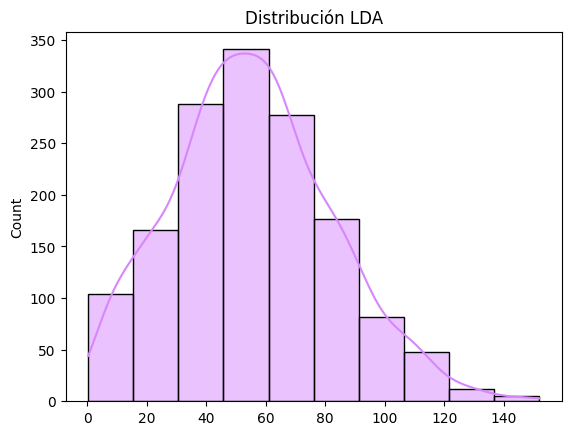

In [ ]:
NC=10 #

plt.figure()
sns.histplot(LDA,kde=True,bins=NC,color="#D786FC")
plt.title('Distribución LDA')
plt.show()


In [ ]:
#Obtenemos la información de la Distribución
counts, bin_edges = np.histogram(LDA, bins=NC)
LI=bin_edges[:-1];LS=bin_edges[1:] #lI-limite inferior, LS-limite superior
mc=(LI+LS)/2

In [ ]:
#Se crea la tabla de caracterización
TAsq=np.column_stack((LI,LS,counts,mc))
df=pd.DataFrame(TAsq,columns=['LI','LS','ND','perdida'])
display(df)

,LI,LS,ND,perdida
0,0.354255,15.502616,104.0,7.928435
1,15.502616,30.650978,166.0,23.076797
2,30.650978,45.799339,288.0,38.225159
3,45.799339,60.947701,341.0,53.373520
4,60.947701,76.096063,277.0,68.521882
5,76.096063,91.244424,177.0,83.670243
6,91.244424,106.392786,82.0,98.818605
7,106.392786,121.541148,48.0,113.966967
8,121.541148,136.689509,12.0,129.115328
9,136.689509,151.837871,5.0,144.263690


15. Se obtienen las medias de dispersión para el **AÑO 4** (Asimetría, Kurtosis) y tendencia central (Media, varianza, desviación)

In [ ]:
u= np.sum(mc*counts)/np.sum(counts)#valor esperado
print("La media de los datos es:",u)

varianza=np.sum(counts*(mc-u)**2)/np.sum(counts)
print("La varianza de los datos es:",varianza)

desviacion=np.sqrt(varianza)
print("La desviación de los datos es:",desviacion)

#Quiero identificar datos raros o outliers
LIe=u+2*desviacion;Lse=u+2*desviacion
filas_out=np.where((LIe<LDA)|(LDA<Lse)) [0]
#LDA.iloc[filas_out,]

from scipy.stats import skew, kurtosis
print("El coeficiente de asimetría es:",skew(LDA))
print("El coeficiente de curtosis es:",kurtosis(LDA))

#Coeficiente de Asimetría
cas=np.sum(counts*(mc-u)**3)/np.sum(counts*desviacion**3)
print("El coeficiente de asimetría es:",cas)
vcas=(skew(LDA)-cas)/skew(LDA)
print("La variación del coeficiente de asimetría es:",vcas*100)

#Coeficiente de Curtosis
curt=np.sum(counts*(mc-u)**4)/np.sum(counts*desviacion**4)-3
print("El coeficiente de curtosis es:",curt)

La media de los datos es: 55.66597231387269
La varianza de los datos es: 738.0837467102078
La desviación de los datos es: 27.167696750188593
El coeficiente de asimetría es: 0.3354409078926966
El coeficiente de curtosis es: -0.06285449119370945
El coeficiente de asimetría es: 0.33970946303261645
La variación del coeficiente de asimetría es: -1.2725207449311218
El coeficiente de curtosis es: -0.10378250280685375


**ANÁLISIS DE LOS RESULTADOS AÑO 4**

ANÁLISIS: De acuerdo con la base de datos, se puede observar un total de 1500 datos y un total de 36 variables. De las medidas de tendencia central se puede observar que la media de las pérdidas se ubicó 55.665 dolares por crédito, mientras que la desviación de los datos se ubico en promedio en los 27.167 dolares. Es importante mencionar que el coeficiente de asimetría se ubico levemente por encima de cero (0.335 y 0.339), lo que indica que la distribución tiende a ser de cola larga. La curtosis es ligeramente negativa (-0.062 y -0.103), lo que indica que la distribución tiene colas más ligeras y un pico menos pronunciado en comparación con una distribución normal.

16. Pérdidas Esperadas, Pérdidas No Esperadas, Pérdidas Catastroficas.

In [ ]:
PE=len(np.where(LDA<u)[0])
print("Las Pérdidas Esperadas son:",PE)
OpVar=np.percentile(LDA,99.9)
print("El costo de aseguramiendo de cada crédito es:",OpVar)
PC=len(np.where(LDA>OpVar)[0])
print("Las Pérdidas Catastróficas son:",PC)
PNE=len(np.where((LDA>u)&(LDA<OpVar))[0])
print("Las Pérdidas No Esperadas son:",PNE)

Las Pérdidas Esperadas son: 781
El costo de aseguramiendo de cada crédito es: 147.29776773898615
Las Pérdidas Catastróficas son: 2
Las Pérdidas No Esperadas son: 717


#DISTRIBUCIÓN LDA POR AÑO



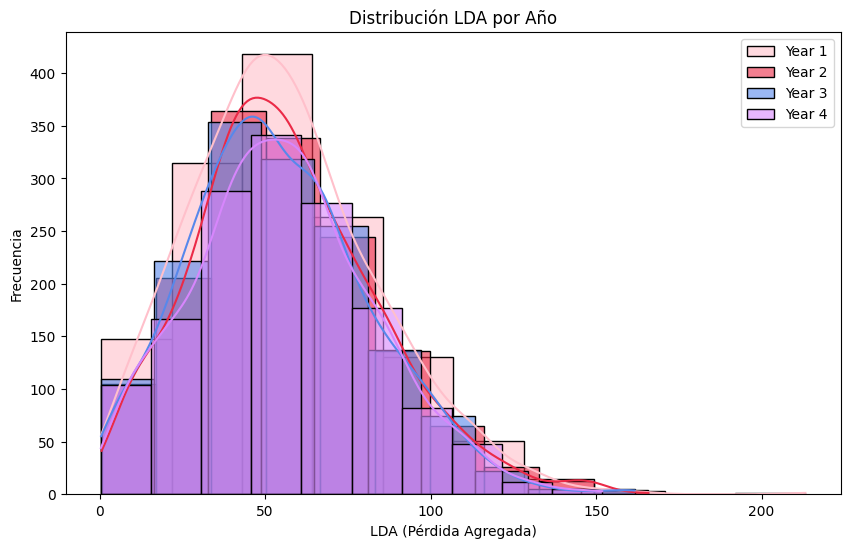

In [ ]:
# Collect LDA for each year
nxl='/content/drive/MyDrive/Integración de Datos y Pros./RETO 1/1. SolicitantesCrédito(USD)_Años.xlsx'

# Year 1
XDB_y1 = pd.read_excel(nxl, sheet_name=5)
LDA_y1 = XDB_y1.iloc[:,25] * XDB_y1.iloc[:,33] * (1 + XDB_y1.iloc[:,35])

# Year 2
XDB_y2 = pd.read_excel(nxl, sheet_name=4)
LDA_y2 = XDB_y2.iloc[:,25] * XDB_y2.iloc[:,33] * (1 + XDB_y2.iloc[:,35])

# Year 3
XDB_y3 = pd.read_excel(nxl, sheet_name=3)
LDA_y3 = XDB_y3.iloc[:,25] * XDB_y3.iloc[:,33] * (1 + XDB_y3.iloc[:,35])

# Year 4
XDB_y4 = pd.read_excel(nxl, sheet_name=2)
LDA_y4 = XDB_y4.iloc[:,25] * XDB_y4.iloc[:,33] * (1 + XDB_y4.iloc[:,35])

# Plot the distributions
plt.figure(figsize=(10, 6))
sns.histplot(LDA_y1, kde=True, bins=10, color='Pink', label='Year 1', alpha=0.6)
sns.histplot(LDA_y2, kde=True, bins=10, color='#EB2A47', label='Year 2', alpha=0.6)
sns.histplot(LDA_y3, kde=True, bins=10, color='#5788EB', label='Year 3', alpha=0.6)
sns.histplot(LDA_y4, kde=True, bins=10, color="#D786FC", label='Year 4', alpha=0.6)

plt.title('Distribución LDA por Año')
plt.xlabel('LDA (Pérdida Agregada)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# **ANÁLISIS GENERAL**

Observando la gráfica de distribución de LDA para los cuatro años y los resultados estadísticos calculados, podemos hacer el siguiente análisis general:

* Las medias de las pérdidas agregadas se mantienen relativamente estables a lo
largo de los cuatro años, oscilando entre aproximadamente 54.36 y 56.36 dólares por crédito. Esto sugiere que el promedio de las pérdidas esperadas por crédito no ha experimentado cambios drásticos en este período.

* La varianza y la desviación estándar también muestran una estabilidad relativa, indicando que la dispersión de las pérdidas alrededor de la media se ha mantenido similar en los cuatro años.

* La asimetría positiva se observa en todos los años, lo que confirma la presencia de una cola larga hacia la derecha en la distribución de pérdidas. Esto es consistente con la naturaleza de las pérdidas crediticias, donde la mayoría de los créditos tienen pérdidas pequeñas o nulas, pero un pequeño número puede resultar en pérdidas significativas.

* La curtosis es positiva en los primeros años (Año 1, Año 2, Año 3) y ligeramente negativa en el Año 4. La curtosis positiva sugiere que las distribuciones tienen colas más pesadas y picos más pronunciados que una distribución normal, lo que implica una mayor probabilidad de eventos de pérdida extremos. La disminución de la curtosis a lo largo del tiempo, especialmente la curtosis ligeramente negativa en el Año 4, sugiere que la distribución de pérdidas en el Año 4 tiene colas más ligeras y se acerca más a una distribución normal en términos de la forma de las colas, lo que podría indicar una menor probabilidad de eventos de pérdida extremadamente grandes en el último año.

En conclusión, a lo largo de los cuatro años, la FINTECH ha mantenido una media y dispersión de pérdidas agregadas relativamente consistentes. Sin embargo, parece haber una tendencia hacia una reducción en la frecuencia y severidad de las pérdidas extremas en los años más recientes.